In [1]:
%matplotlib inline
from __future__ import division

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [4]:
energy = pd.read_csv('../../data/recs2009_public.csv')
energy.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(12083, 940)

In [5]:
vars_imputation_flags = ([
    'ZKOWNRENT',
    'ZCONDCOOP',
    'ZYEARMADE',
    'ZYEARMADERANGE',
    'ZOCCUPYYRANGE',
    'ZCONVERSION',
    'ZORIG1FAM',
    'ZLOOKLIKE',
    'ZNUMFLRS',
    'ZNUMAPTS',
    'ZWALLTYPE',
    'ZROOFTYPE',
    'ZSTUDIO',
    'ZNAPTFLRS',
    'ZSTORIES',
    'ZTYPEHUQ4',
    'ZBEDROOMS',
    'ZNCOMBATH',
    'ZNHAFBATH',
    'ZOTHROOMS',
    'ZCELLAR',
    'ZCRAWL',
    'ZCONCRETE',
    'ZBASEFIN',
    'ZFINBASERMS',
    'ZBASEHEAT',
    'ZBASEHT2',
    'ZPCTBSTHT',
    'ZBASECOOL',
    'ZBASECL2',
    'ZPCTBSTCL',
    'ZBASEUSE',
    'ZATTIC',
    'ZATTICFIN',
    'ZFINATTRMS',
    'ZATTCHEAT',
    'ZATTCHT2',
    'ZPCTATTHT',
    'ZATTCCOOL',
    'ZPCTATTCL',
    'ZATTCCL2',
    'ZATTICUSE',
    'ZPRKGPLC1',
    'ZSIZEOFGARAGE',
    'ZGARGLOC',
    'ZGARGHEAT',
    'ZGARGCOOL',
    'ZPRKGPLC2',
    'ZSIZEOFDETACH',
    'ZSTOVEN',
    'ZSTOVENFUEL',
    'ZSTOVE',
    'ZSTOVEFUEL',
    'ZOVEN',
    'ZOVENFUEL',
    'ZOVENUSE',
    'ZOVENCLN',
    'ZTYPECLN',
    'ZMICRO',
    'ZAMTMICRO',
    'ZDEFROST',
    'ZOUTGRILL',
    'ZOUTGRILLFUEL',
    'ZTOPGRILL',
    'ZSTGRILA',
    'ZTOASTER',
    'ZNUMMEAL',
    'ZFUELFOOD',
    'ZCOFFEE',
    'ZNUMFRIG',
    'ZTYPERFR1',
    'ZSIZRFRI1',
    'ZREFRIGT1',
    'ZICE',
    'ZAGERFRI1',
    'ZTYPERFR2',
    'ZSIZRFRI2',
    'ZREFRIGT2',
    'ZMONRFRI2',
    'ZAGERFRI2',
    'ZTYPERFR3',
    'ZSIZRFRI3',
    'ZREFRIGT3',
    'ZMONRFRI3',
    'ZAGERFRI3',
    'ZSEPFREEZ',
    'ZNUMFREEZ',
    'ZUPRTFRZR',
    'ZSIZFREEZ',
    'ZFREEZER',
    'ZAGEFRZR',
    'ZUPRTFRZR2',
    'ZSIZFREEZ2',
    'ZFREEZER2',
    'ZAGEFRZR2',
    'ZDISHWASH',
    'ZDWASHUSE',
    'ZAGEDW',
    'ZCWASHER',
    'ZTOPFRONT',
    'ZWASHLOAD',
    'ZWASHTEMP',
    'ZRNSETEMP',
    'ZAGECWASH',
    'ZDRYER',
    'ZDRYRFUEL',
    'ZDRYRUSE',
    'ZAGECDRYER',
    'ZTVCOLOR',
    'ZTVSIZE1',
    'ZTVTYPE1',
    'ZCABLESAT1',
    'ZCOMBODVR1',
    'ZDVR1',
    'ZDIGITSTB1',
    'ZPLAYSTA1',
    'ZCOMBOVCRDVD1',
    'ZVCR1',
    'ZDVD1',
    'ZTVAUDIOSYS1',
    'ZOTHERSTB1',
    'ZTVONWD1',
    'ZTVONWDWATCH1',
    'ZTVONWE1',
    'ZTVONWEWATCH1',
    'ZTVSIZE2',
    'ZTVTYPE2',
    'ZCABLESAT2',
    'ZCOMBODVR2',
    'ZDVR2',
    'ZDIGITSTB2',
    'ZPLAYSTA2',
    'ZCOMBOVCRDVD2',
    'ZVCR2',
    'ZDVD2',
    'ZTVAUDIOSYS2',
    'ZOTHERSTB2',
    'ZTVONWD2',
    'ZTVONWDWATCH2',
    'ZTVONWE2',
    'ZTVONWEWATCH2',
    'ZTVSIZE3',
    'ZTVTYPE3',
    'ZCABLESAT3',
    'ZCOMBODVR3',
    'ZDVR3',
    'ZDIGITSTB3',
    'ZPLAYSTA3',
    'ZCOMBOVCRDVD3',
    'ZVCR3',
    'ZDVD3',
    'ZTVAUDIOSYS3',
    'ZOTHERSTB3',
    'ZTVONWD3',
    'ZTVONWDWATCH3',
    'ZTVONWE3',
    'ZTVONWEWATCH3',
    'ZCOMPUTER',
    'ZNUMPC',
    'ZPCTYPE1',
    'ZMONITOR1',
    'ZTIMEON1',
    'ZPCONOFF1',
    'ZPCSLEEP1',
    'ZPCTYPE2',
    'ZMONITOR2',
    'ZTIMEON2',
    'ZPCONOFF2',
    'ZPCSLEEP2',
    'ZPCTYPE3',
    'ZMONITOR3',
    'ZTIMEON3',
    'ZPCONOFF3',
    'ZPCSLEEP3',
    'ZINTERNET',
    'ZINDIALUP',
    'ZINDSL',
    'ZINCABLE',
    'ZINSATEL',
    'ZINWIRELESS',
    'ZPCPRINT',
    'ZFAX',
    'ZCOPIER',
    'ZWELLPUMP',
    'ZDIPSTICK',
    'ZSWAMPCOL',
    'ZAQUARIUM',
    'ZSTEREO',
    'ZNOCORD',
    'ZANSMACH',
    'ZBATTOOLS',
    'ZBATCHRG',
    'ZCHRGPLGT',
    'ZELECDEV',
    'ZELECCHRG',
    'ZCHRGPLGE',
    'ZHEATHOME',
    'ZDNTHEAT',
    'ZEQUIPNOHEAT',
    'ZFUELNOHEAT',
    'ZEQUIPM',
    'ZFUELHEAT',
    'ZMAINTHT',
    'ZEQUIPAGE',
    'ZHEATOTH',
    'ZFURNFUEL',
    'ZRADFUEL',
    'ZPIPEFUEL',
    'ZRMHTFUEL',
    'ZHSFUEL',
    'ZFPFUEL',
    'ZNGFPFLUE',
    'ZUSENGFP',
    'ZRNGFUEL',
    'ZDIFFUEL',
    'ZEQMAMT',
    'ZHEATROOM',
    'ZTHERMAIN',
    'ZNUMTHERM',
    'ZPROTHERM',
    'ZAUTOHEATNITE',
    'ZAUTOHEATDAY',
    'ZTEMPHOME',
    'ZTEMPGONE',
    'ZTEMPNITE',
    'ZMOISTURE',
    'ZUSEMOISTURE',
    'ZNUMH2OHTRS',
    'ZNUMH2ONOTNK',
    'ZH2OTYPE1',
    'ZFUELH2O',
    'ZWHEATOTH',
    'ZWHEATSIZ',
    'ZWHEATAGE',
    'ZWHEATBKT',
    'ZH2OTYPE2',
    'ZFUELH2O2',
    'ZWHEATSIZ2',
    'ZWHEATAGE2',
    'ZAIRCOND',
    'ZDNTAC',
    'ZCOOLTYPENOAC',
    'ZCOOLTYPE',
    'ZDUCTS',
    'ZCENACHP',
    'ZACOTHERS',
    'ZMAINTAC',
    'ZAGECENAC',
    'ZUSECENAC',
    'ZACROOMS',
    'ZTHERMAINAC',
    'ZPROTHERMAC',
    'ZAUTOCOOLNITE',
    'ZAUTOCOOLDAY',
    'ZTEMPHOMEAC',
    'ZTEMPGONEAC',
    'ZTEMPNITEAC',
    'ZNUMBERAC',
    'ZWWACAGE',
    'ZUSEWWAC',
    'ZNUMCFAN',
    'ZUSECFAN',
    'ZTREESHAD',
    'ZNOTMOIST',
    'ZUSENOTMOIST',
    'ZHIGHCEIL',
    'ZCATHCEIL',
    'ZSWIMPOOL',
    'ZPOOL',
    'ZFUELPOOL',
    'ZRECBATH',
    'ZFUELTUB',
    'ZLGT12',
    'ZLGT4',
    'ZLGT1',
    'ZNOUTLGTNT',
    'ZNGASLIGHT',
    'ZSLDDRS',
    'ZDOOR1SUM',
    'ZWINDOWS',
    'ZTYPEGLASS',
    'ZNEWGLASS',
    'ZADQINSUL',
    'ZINSTLINS',
    'ZAGEINS',
    'ZDRAFTY',
    'ZINSTLWS',
    'ZAGEWS',
    'ZAUDIT',
    'ZAGEAUD',
    'ZONSITE',
    'ZONSITEGRID',
    'ZPELHEAT',
    'ZPELHOTWA',
    'ZPELCOOK',
    'ZPELAC',
    'ZPELLIGHT',
    'ZOTHERWAYEL',
    'ZPGASHEAT',
    'ZPGASHTWA',
    'ZPUGCOOK',
    'ZPUGOTH',
    'ZOTHERWAYNG',
    'ZFOPAY',
    'ZOTHERWAYFO',
    'ZLPGPAY',
    'ZOTHERWAYLPG',
    'ZKERODEL',
    'ZKEROCASH',
    'ZNOCRCASH',
    'ZNKRGALNC',
    'ZWOODLOGS',
    'ZWDSCRAP',
    'ZWDPELLET',
    'ZWDOTHER',
    'ZWOODAMT',
    'ZNUMCORDS',
    'ZHHSEX',
    'ZHHAGE',
    'ZEMPLOYHH',
    'ZSPOUSE',
    'ZSDESCENT',
    'ZHouseholder_Race',
    'ZEDUCATION',
    'ZNHSLDMEM',
    'ZAGEHHMEMCAT2',
    'ZAGEHHMEMCAT3',
    'ZAGEHHMEMCAT4',
    'ZAGEHHMEMCAT5',
    'ZAGEHHMEMCAT6',
    'ZAGEHHMEMCAT7',
    'ZAGEHHMEMCAT8',
    'ZAGEHHMEMCAT9',
    'ZAGEHHMEMCAT10',
    'ZAGEHHMEMCAT11',
    'ZAGEHHMEMCAT12',
    'ZAGEHHMEMCAT13',
    'ZAGEHHMEMCAT14',
    'ZHBUSNESS',
    'ZATHOME',
    'ZTELLWORK',
    'ZTELLDAYS',
    'ZOTHWORK',
    'ZWORKPAY',
    'ZRETIREPY',
    'ZSSINCOME',
    'ZCASHBEN',
    'ZINVESTMT',
    'ZRGLRPAY',
    'ZMONEYPY',
    'ZHUPROJ',
    'ZRENTHELP',
    'ZFOODASST',
    'ZTOTSQFT',
    'ZTOTSQFT_EN',
    'ZTOTHSQFT',
    'ZTOTUSQFT',
    'ZTOTCSQFT',
    'ZTOTUCSQFT'
])

In [6]:
energy = energy.drop(vars_imputation_flags, axis=1)
energy.shape

(12083, 581)

In [7]:
response_var = ['TOTALDOL']

vars_response = ([
'NWEIGHT',
'NOCRCASH',
'NKRGALNC',
'NUMCORDS',
'KWH',
'KWHSPH',
'KWHCOL',
'KWHWTH',
'KWHRFG',
'KWHOTH', 
'BTUEL',
'BTUELSPH',
'BTUELCOL',
'BTUELWTH',
'BTUELRFG',
'BTUELOTH',
'DOLLAREL',
'DOLELSPH',
'DOLELCOL',
'DOLELWTH',
'DOLELRFG',
'DOLELOTH',
'CUFEETNG',
'CUFEETNGSPH',
'CUFEETNGWTH',
'CUFEETNGOTH',
'BTUNG',
'BTUNGSPH',
'BTUNGWTH',
'BTUNGOTH',
'DOLLARNG',
'DOLNGSPH',
'DOLNGWTH',
'DOLNGOTH',
'GALLONLP',
'GALLONLPSPH',
'GALLONLPWTH',
'GALLONLPOTH',
'BTULP',
'BTULPSPH',
'BTULPWTH',
'BTULPOTH',
'DOLLARLP',
'DOLLPSPH',
'DOLLPWTH',
'DOLLPOTH',
'GALLONFO',
'GALLONFOSPH',
'GALLONFOWTH',
'GALLONFOOTH',
'BTUFO',
'BTUFOSPH',
'BTUFOWTH',
'BTUFOOTH',
'DOLLARFO',
'DOLFOSPH',
'DOLFOWTH',
'DOLFOOTH',
'GALLONKER',
'GALLONKERSPH',
'GALLONKERWTH',
'GALLONKEROTH',
'BTUKER',
'BTUKERSPH',
'BTUKERWTH',
'BTUKEROTH',
'DOLLARKER',
'DOLKERSPH',
'DOLKERWTH',
'DOLKEROTH',
'BTUWOOD',
'CORDSWD',
'TOTALBTU',
'TOTALBTUSPH',
'TOTALBTUCOL',
'TOTALBTUWTH',
'TOTALBTURFG',
'TOTALBTUOTH',
'TOTALDOL',
'TOTALDOLSPH',
'TOTALDOLCOL',
'TOTALDOLWTH',
'TOTALDOLRFG',
'TOTALDOLOTH'
])

In [8]:
energy = energy.drop(filter(lambda x: x not in response_var, vars_response), axis=1)
energy.shape

(12083, 498)

In [9]:
vars_predictor_quan = ([
    'HDD65',
    'CDD65',
    'HDD30YR',
    'CDD30YR',
    'NUMFLRS',
    'NUMAPTS',
    'BEDROOMS',
    'NCOMBATH',
    'NHAFBATH',
    'OTHROOMS',
    'TOTROOMS',
    'STOVEN',
    'STOVE',
    'OVEN',
    'NUMFRIG',
    'MONRFRI2',
    'MONRFRI3',
    'TVCOLOR',
    'NUMPC',
    'PCPRINT',
    'HEATROOM',
    'NUMTHERM',
    'TEMPHOME',
    'TEMPGONE',
    'TEMPNITE',
    'NUMH2ONOTNK',
    'NUMH2OHTRS',
    'ACROOMS',
    'TEMPHOMEAC',
    'TEMPGONEAC',
    'TEMPNITEAC',
    'NUMBERAC',
    'NUMCFAN',
    'LGT12',
    'LGT12EE',
    'LGT4',
    'LGT4EE',
    'LGT1',
    'LGT1EE',
    'NOUTLGTNT',
    'LGTOEE',
    'NGASLIGHT',
    'DOOR1SUM',
    'NHSLDMEM',
    'HHAGE',
    'TELLDAYS',
    'TOTSQFT',
    'TOTSQFT_EN',
    'TOTHSQFT',
    'TOTUSQFT',
    'TOTCSQFT',
    'TOTUCSQFT',
    'HDD50',
    'CDD80',
    'GND_HDD65',
    'WSF',
    'OA_LAT',
    'GWT',
    'DesignDBT99',
    'DesignDBT1'
])

In [10]:
vars_predictor_qual = [v for v in energy.columns if v not in vars_predictor_quan]

In [11]:
("Looks like we've got {} quantitative predictors and {} qualitative".
 format(len(vars_predictor_quan), len(vars_predictor_qual)))

"Looks like we've got 60 quantitative predictors and 438 qualitative"

Let's screen quantitative variables

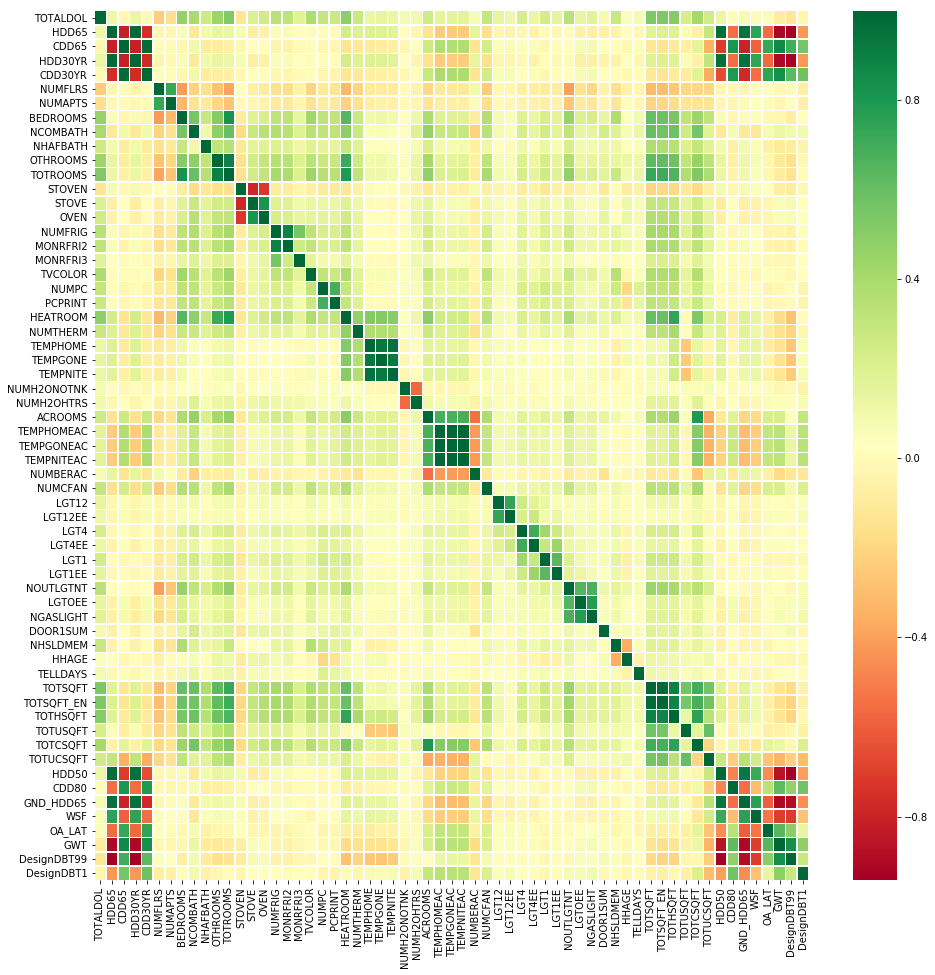

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(energy[response_var + vars_predictor_quan].corr(), linewidths=.5, cmap="RdYlGn")

Let's screen quantitative variables

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [14]:
y = energy[response_var].values.flatten()
X = pd.get_dummies(energy[vars_predictor_qual])
del X['TOTALDOL']

In [15]:
regr = DecisionTreeRegressor()
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
features = pd.DataFrame(
    {'feature_importances' : pd.Series(regr.feature_importances_), 'variable': pd.Series(X.columns)})

In [17]:
features[features.feature_importances >= 0.2]

,feature_importances,variable


In [18]:
first_50 = features.sort_values(by='feature_importances', ascending=False).head(50)
first_50

,feature_importances,variable
298,0.143894,WINDOWS
416,0.068401,MONEYPY
9,0.056247,YEARMADE
3,0.049085,REPORTABLE_DOMAIN
291,0.038090,FUELPOOL
2,0.032369,DIVISION
393,0.030252,AGEHHMEMCAT2
43,0.026807,PRKGPLC1
394,0.018898,AGEHHMEMCAT3
290,0.013631,POOL


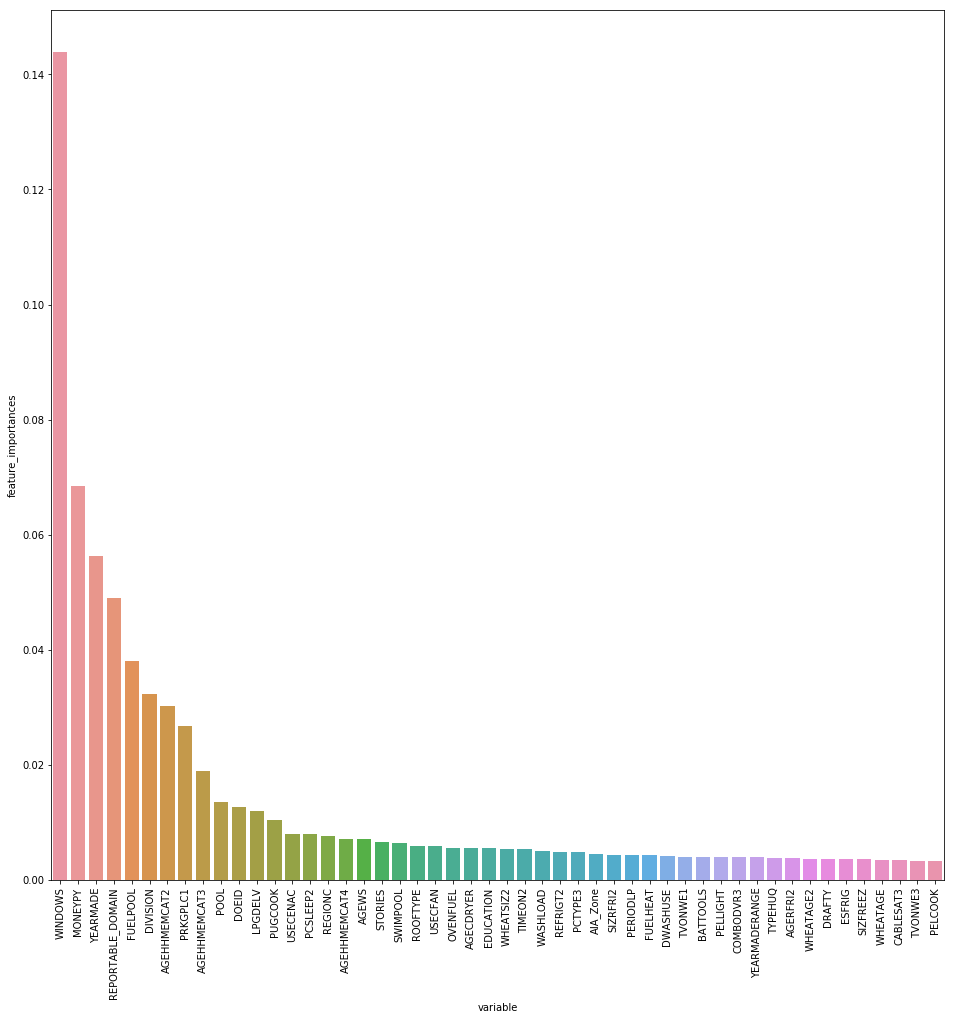

In [19]:
plt.figure(figsize=(16,16))
barplot = sns.barplot(data=first_50, y='feature_importances', x='variable')
_ = barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

Now plot top 5!

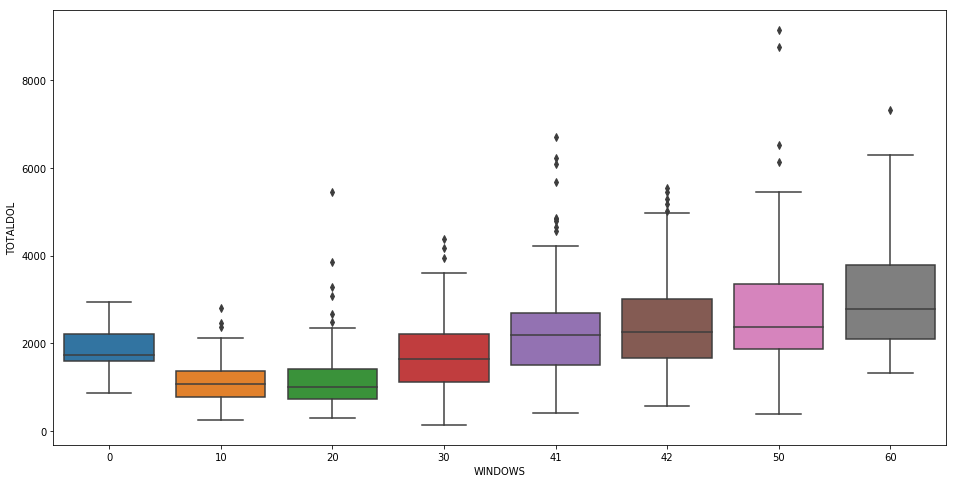

In [22]:
energy_sample = energy.sample(1000)
sns.boxplot(data=energy_sample, y = 'TOTALDOL', x='WINDOWS')

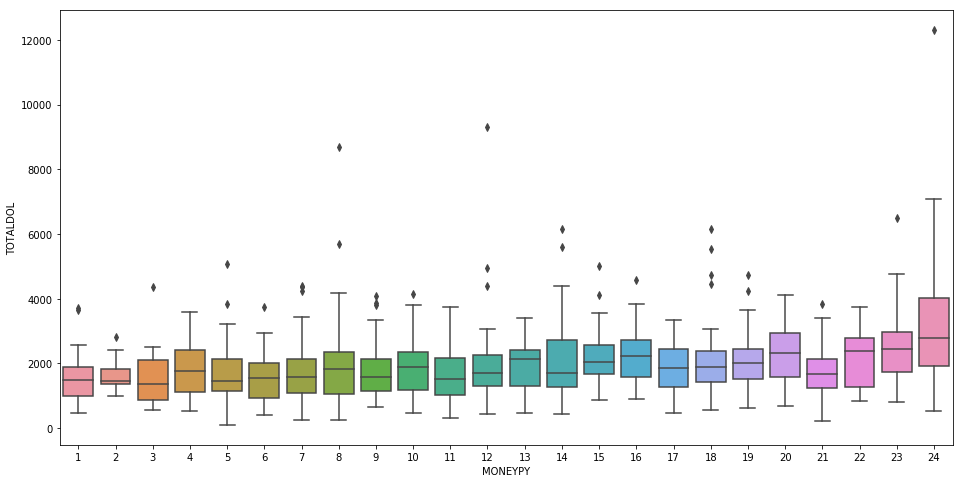

In [30]:
energy_sample = energy.sample(1000)
sns.boxplot(data=energy_sample, y = 'TOTALDOL', x='MONEYPY')

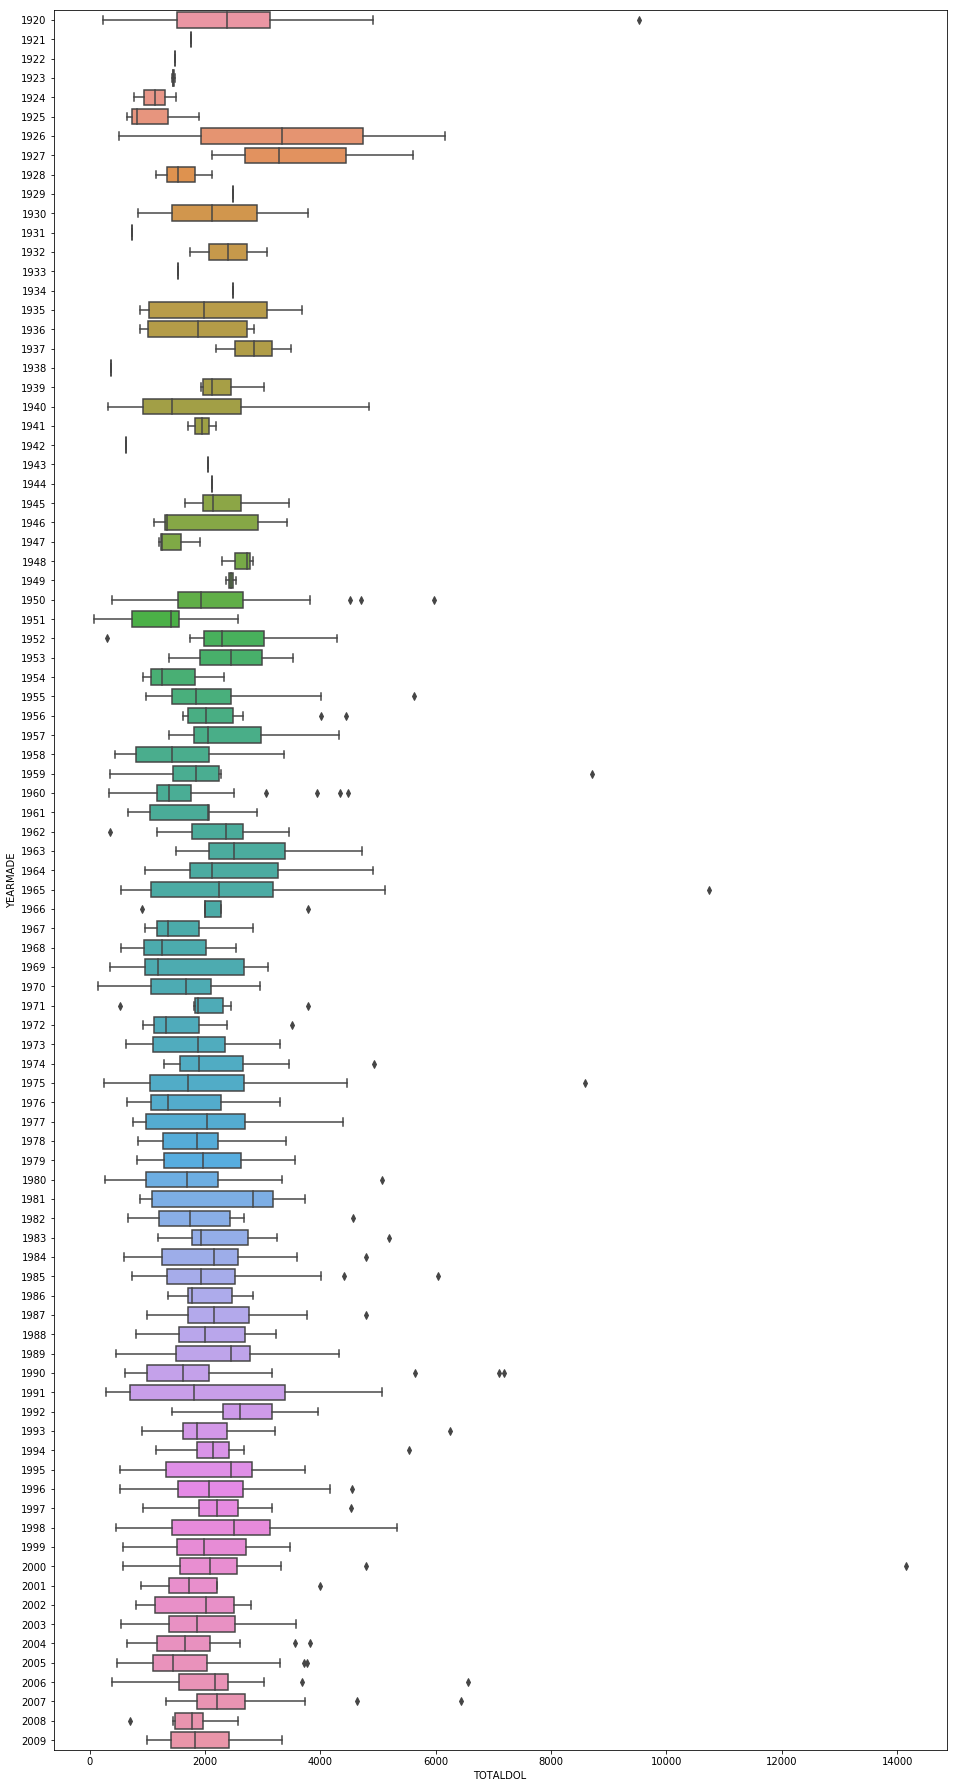

In [31]:
plt.figure(figsize=(16,32))
energy_sample = energy.sample(1000)
sns.boxplot(data=energy_sample, y = 'YEARMADE', x='TOTALDOL', orient='h')

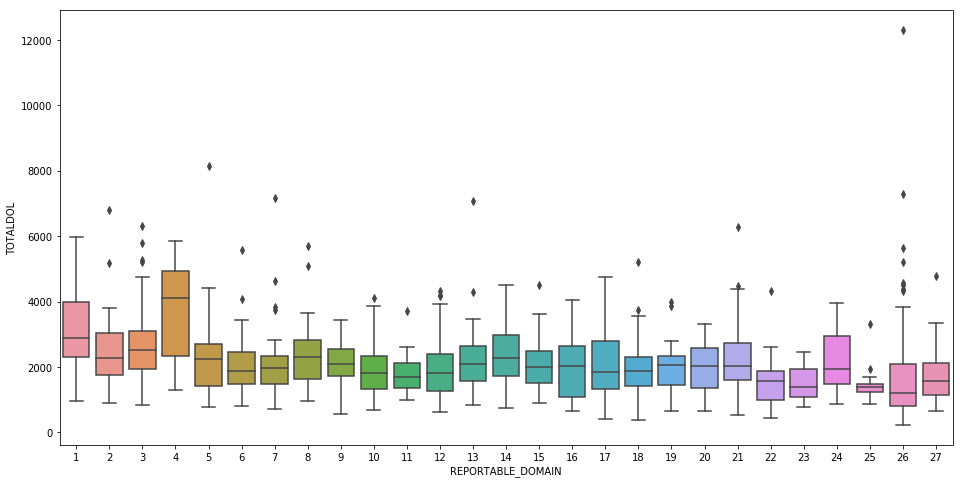

In [33]:
energy_sample = energy.sample(1000)
sns.boxplot(data=energy_sample, y = 'TOTALDOL', x='REPORTABLE_DOMAIN')

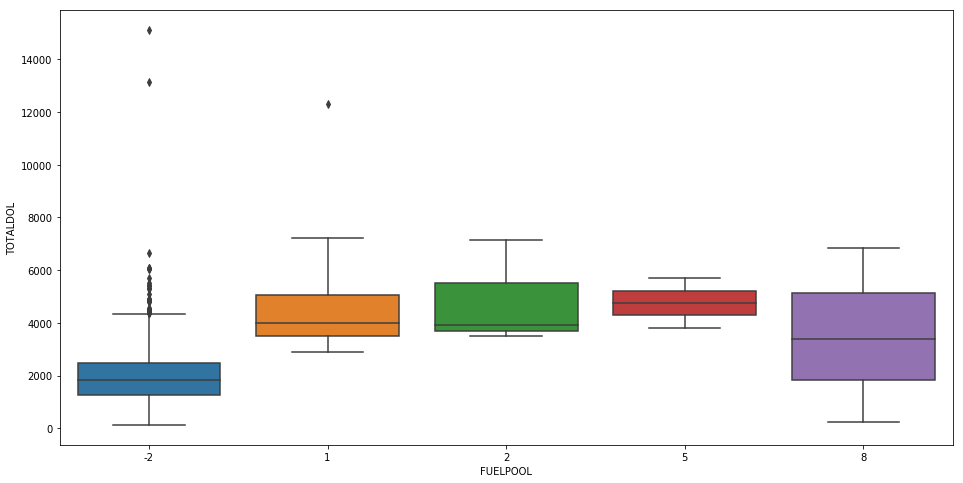

In [34]:
energy_sample = energy.sample(1000)
sns.boxplot(data=energy_sample, y = 'TOTALDOL', x='FUELPOOL')

In [37]:
energy.to_csv('../../data/recs2009_public_vlad_clean.csv', index=False)